In [24]:
import numpy as np,pandas as pd,seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [25]:
df = pd.read_csv("Iris.csv")

## Dataset description

In [26]:
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [27]:
df.shape

(150, 5)

In [28]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [29]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## Comparision between the categories of Species

<Axes: xlabel='species', ylabel='sepal_length'>

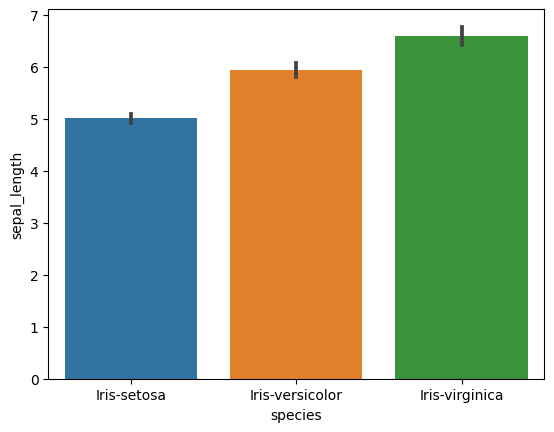

In [30]:
sns.barplot(x="species",y="sepal_length",data = df)

<Axes: xlabel='species', ylabel='sepal_width'>

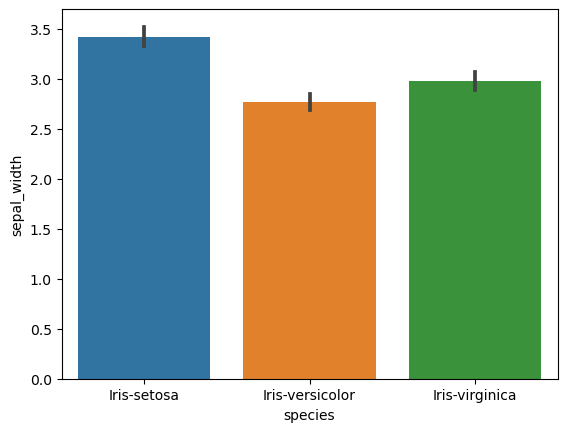

In [31]:
sns.barplot(x="species",y="sepal_width",data = df)

<Axes: xlabel='species', ylabel='petal_width'>

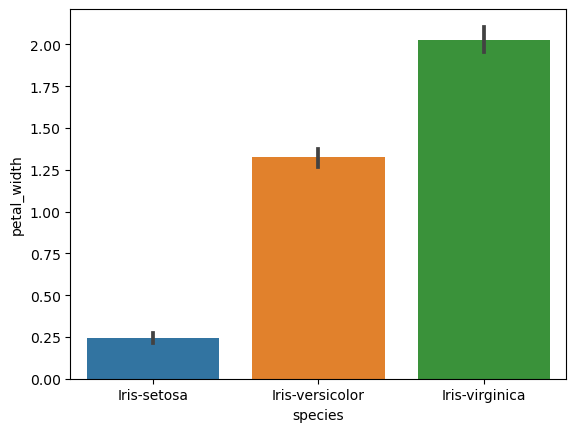

In [32]:
sns.barplot(x="species",y="petal_width",data = df)

<Axes: xlabel='species', ylabel='petal_length'>

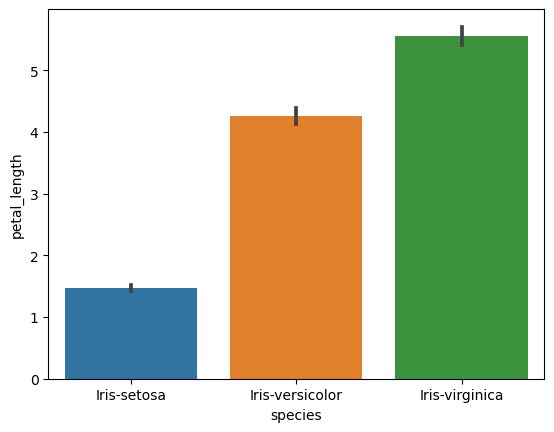

In [33]:
sns.barplot(x="species",y="petal_length",data = df)

## Handling missing values

In [34]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Handling duplicate values

In [35]:
df.duplicated().sum()

3

In [36]:
df[df.duplicated()]


,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [37]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Handling outliers

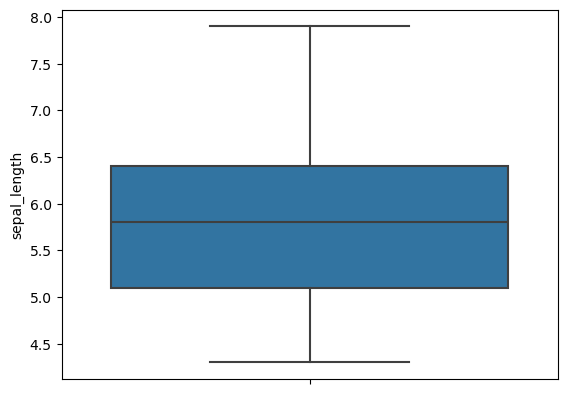

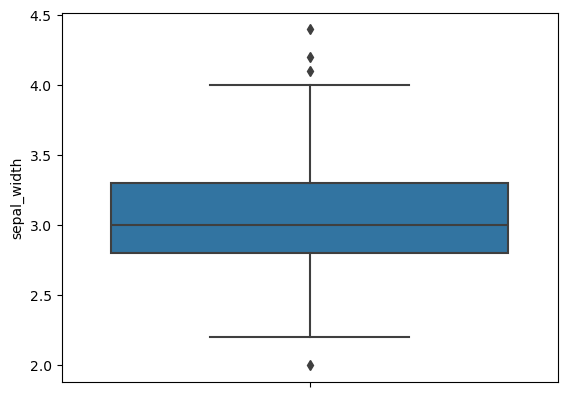

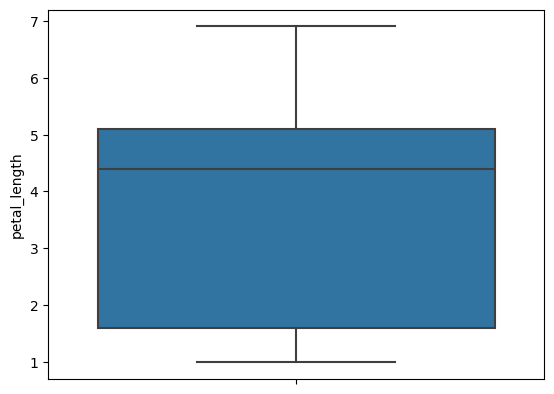

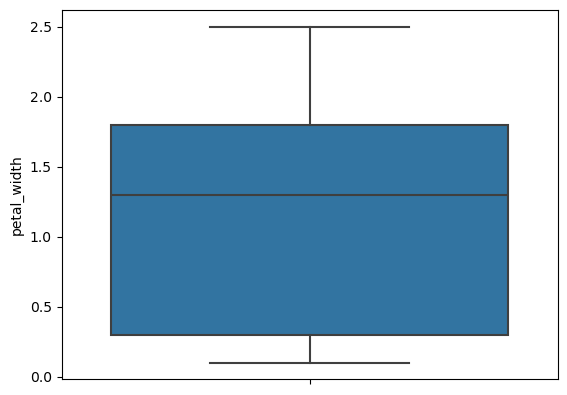

In [38]:
l=['sepal_length','sepal_width','petal_length','petal_width']
for i in l:
    sns.boxplot(y=df[i])
    plt.show()

In [39]:
def rem_out(c):
    sorted(c)
    q1,q3=c.quantile([0.25,0.75])
    IQR=q3-q1
    lr=q1-(1.5*IQR)
    ur=q3+(1.5*IQR)
    return lr,ur

In [40]:
l,u=rem_out(df['sepal_width'])
df['sepal_width']=np.where(df['sepal_width']>u,u,df['sepal_width'])
df['sepal_width']=np.where(df['sepal_width']<l,l,df['sepal_width'])

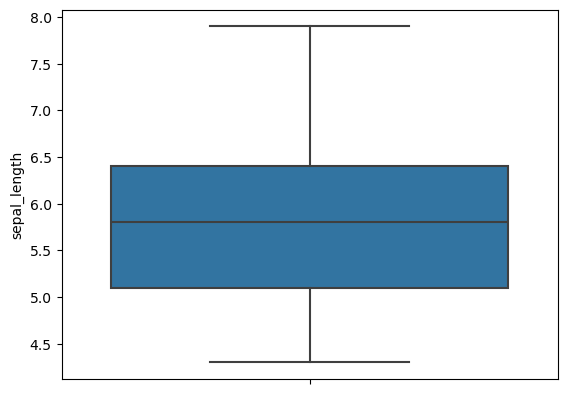

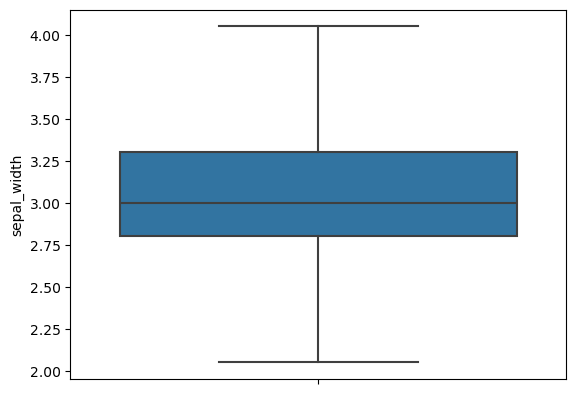

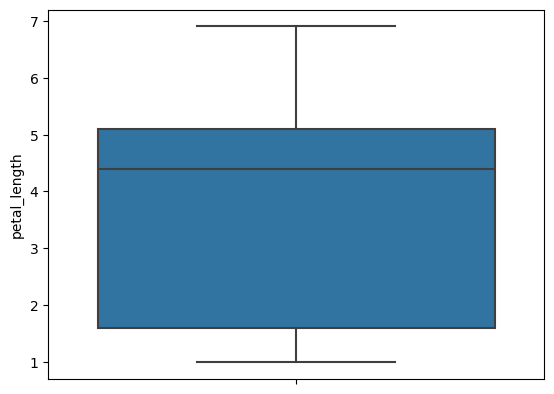

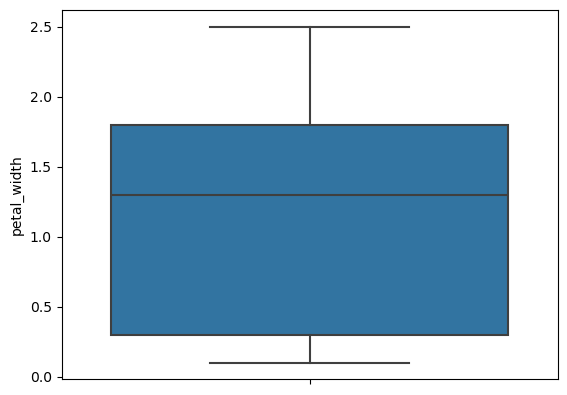

In [41]:
l=['sepal_length','sepal_width','petal_length','petal_width']
for i in l:
    sns.boxplot(y=df[i])
    plt.show()

In [42]:
feature = ["sepal_length","sepal_width","petal_length","petal_width"]
X = df[feature]
y = df['species']

## Correlation among the columns

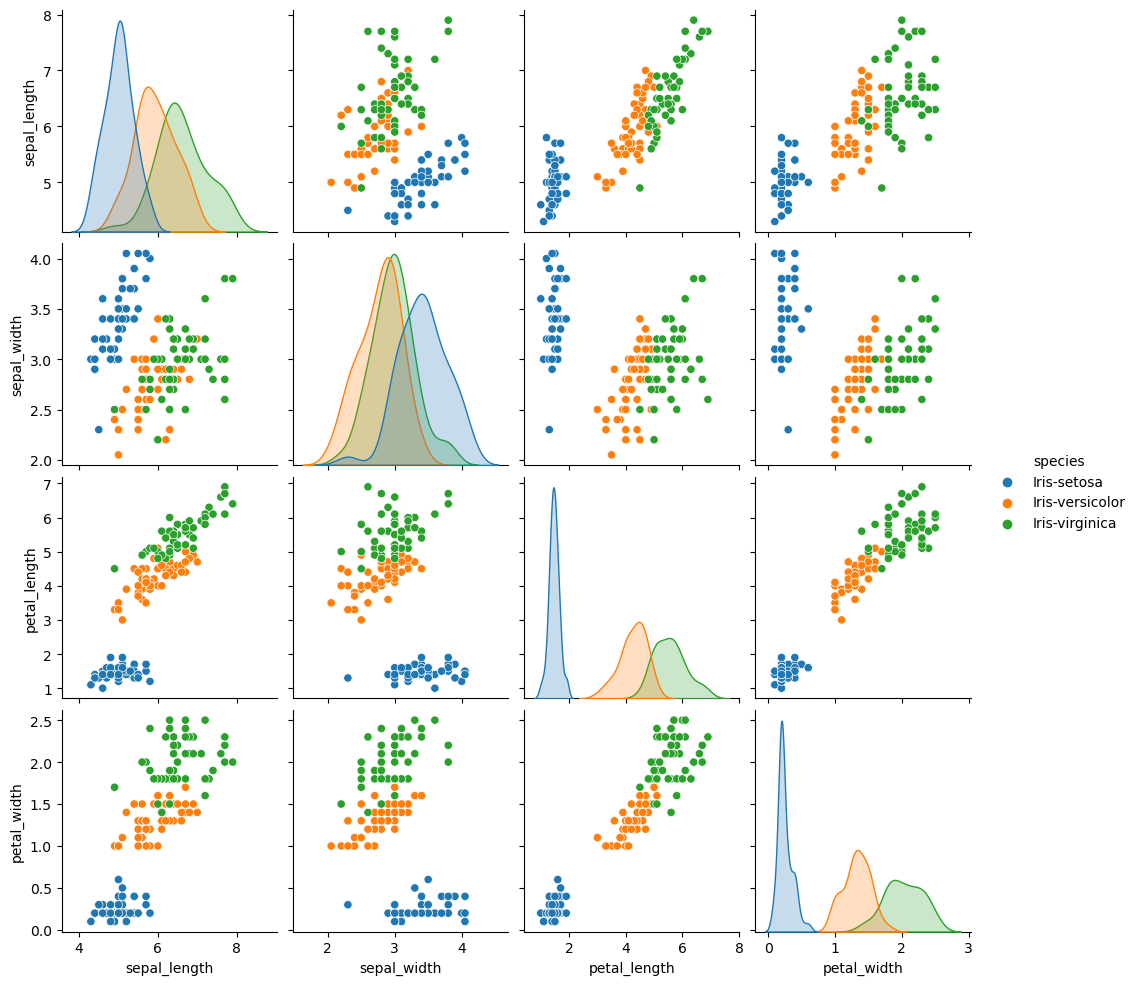

In [43]:
sns.pairplot(data=df,hue='species')

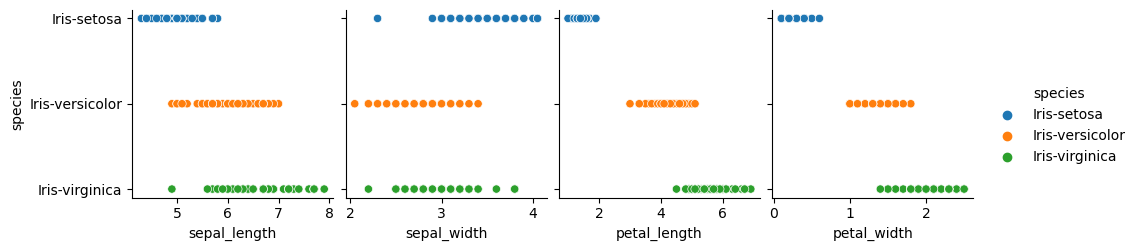

In [44]:
sns.pairplot(data=df,y_vars='species',hue='species')

In [45]:
df.groupby(by='species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.010417,3.419792,1.462500,0.250000
Iris-versicolor,5.936000,2.771000,4.260000,1.326000
Iris-virginica,6.604082,2.979592,5.561224,2.028571


## Train and test model split

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Logistic Regression

In [48]:
model_1 = LogisticRegression()
model_1.fit(x_train,y_train)

LogisticRegression()

In [49]:
model_1.score(x_train,y_train)

0.9705882352941176

In [50]:
model_pred_1 = model_1.predict(x_test)
accuracy_score(model_pred_1,y_test)

0.9555555555555556

## KNN

In [51]:
model_2 = KNeighborsClassifier(n_neighbors=8)
model_2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [52]:
model_2.score(x_train,y_train)

0.9607843137254902

In [53]:
model_pred_2 = model_2.predict(x_test)

In [54]:
accuracy_score(model_pred_2,y_test)

0.9555555555555556

## SVC

In [55]:
model_3 = SVC()
model_3.fit(x_train,y_train)

SVC()

In [56]:
model_3.score(x_train,y_train)

0.9705882352941176

In [57]:
model_pred_3 = model_3.predict(x_test)
accuracy_score(model_pred_3,y_test)

0.9555555555555556

## Decision Tree 

In [58]:
model_4 = DecisionTreeClassifier(random_state=1,max_depth=2)
model_4.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [59]:
model_4.score(x_train,y_train)

0.9705882352941176

In [60]:
model_pred_4 = model_4.predict(x_test)
accuracy_score(model_pred_4,y_test)

0.9333333333333333

## Classification report of all the models

In [61]:
l = [model_1,model_2,model_3,model_4]
for i in l:
    predictions = i.predict(x_test)
    print(i,"\n")
    print(classification_report(y_test,predictions))
    print("\n")

LogisticRegression() 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



KNeighborsClassifier(n_neighbors=8) 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



SVC() 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-ver

## Visual representation of the accuracy of all the models

In [64]:
l = [model_1,model_2,model_3,model_4]
score_res = []
for i in l:
    predictions = i.predict(x_test)
    score_res.append(accuracy_score(predictions,y_test))
res = pd.DataFrame({
    'Model':['Logistic Regression','KNN','SVC','Decision Tree'],
    'Accuracy Score':[score_res[0],score_res[1],score_res[2],score_res[3]],
    'Accuracy Score (in %)':[95,95,95,93]})
res=res.sort_values('Accuracy Score')
px.line(data_frame=res,x=res['Model'],y=res['Accuracy Score']*100,title='Model Accuracy Score').show()

## Checking the model's output on user input

In [63]:
sl = int(input("enter the values of 'sepal length': "))
sw = int(input("enter the values of 'sepal width': "))
pl = int(input("enter the values of 'petal length': "))
pw = int(input("enter the values of 'petal width': "))
inp = np.array([[sl,sw,pl,pw]])
pred_1 = model_1.predict(inp)
print("\nModel's Predictions: ")
print("\nLogistic Regression Prediction: ",pred_1)
pred_2 = model_2.predict(inp)
print("KNN Prediction: ",pred_2)
pred_3 = model_3.predict(inp)
print("SVC Prediction: ",pred_3)
pred_4 = model_4.predict(inp)
print("Decsion Tree Prediction: ",pred_4)


Model's Predictions: 

Logistic Regression Prediction:  ['Iris-virginica']
KNN Prediction:  ['Iris-versicolor']
SVC Prediction:  ['Iris-virginica']
Decsion Tree Prediction:  ['Iris-virginica']
